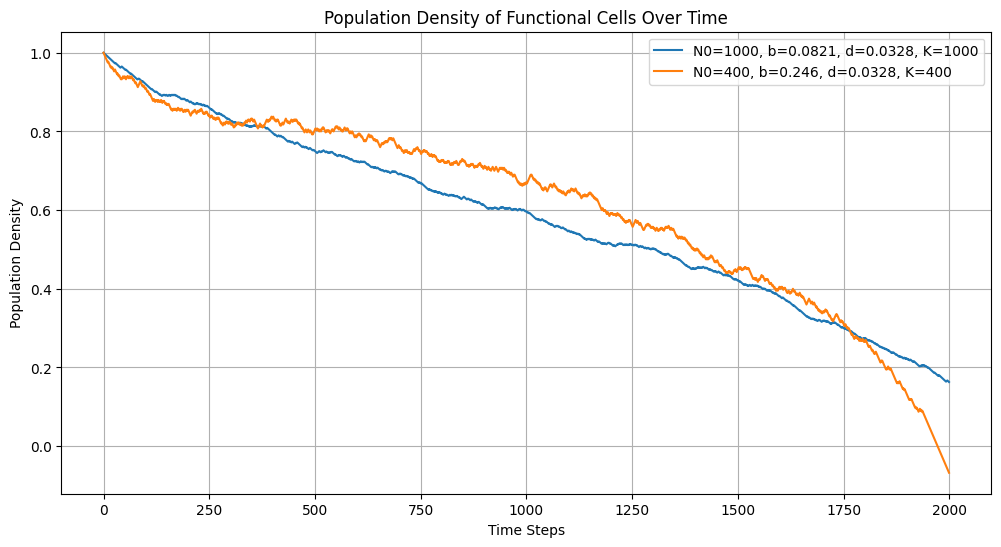

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def gillespie_simulation(N0, b, d, K, h, time_steps):
    N = N0
    populations = []

    for t in range(time_steps):
        populations.append(N)

        # Calculate rates
        birth_rate = b * N * (1 - N / K)  # Logistic growth term
        death_rate = d * N + h(t)  # Include radiation death rate

        total_rate = birth_rate + death_rate

        if total_rate == 0:
            break

        # Time until next event
        dt = np.random.exponential(1 / total_rate)

        # Determine if event is birth or death
        if np.random.rand() < (birth_rate / total_rate):
            N += 1  # Birth event
        else:
            N -= 1  # Death event

    return populations

def radiation_hazard(t):
    """Example: Linear increase in death rate due to radiation over time."""
    return 0.02 * t  # Adjust this function as needed for different scenarios

def run_simulation_and_plot(parameter_sets, time_steps = 2000):


    plt.figure(figsize=(12, 6))

    for params in parameter_sets:
        populations = gillespie_simulation(params["N0"], params["b"], params["d"], params["K"], radiation_hazard, time_steps)

        # Normalize population to get density
        density = np.array(populations) / params["K"]

        plt.plot(density, label=f'N0={params["N0"]}, b={params["b"]}, d={params["d"]}, K={params["K"]}')

    plt.title('Population Density of Functional Cells Over Time')
    plt.xlabel('Time Steps')
    plt.ylabel('Population Density')
    plt.legend()
    plt.grid()
    plt.show()

# Run the simulation and plot results
parameter_sets = [
        {"N0": 1000, "b": 0.0821, "d": 0.0328, "K": 1000},  # Parameter set 1
        {"N0": 400, "b": 0.246, "d": 0.0328, "K": 400},     # Parameter set 2
    ]
run_simulation_and_plot(parameter_sets, time_steps = 2000)

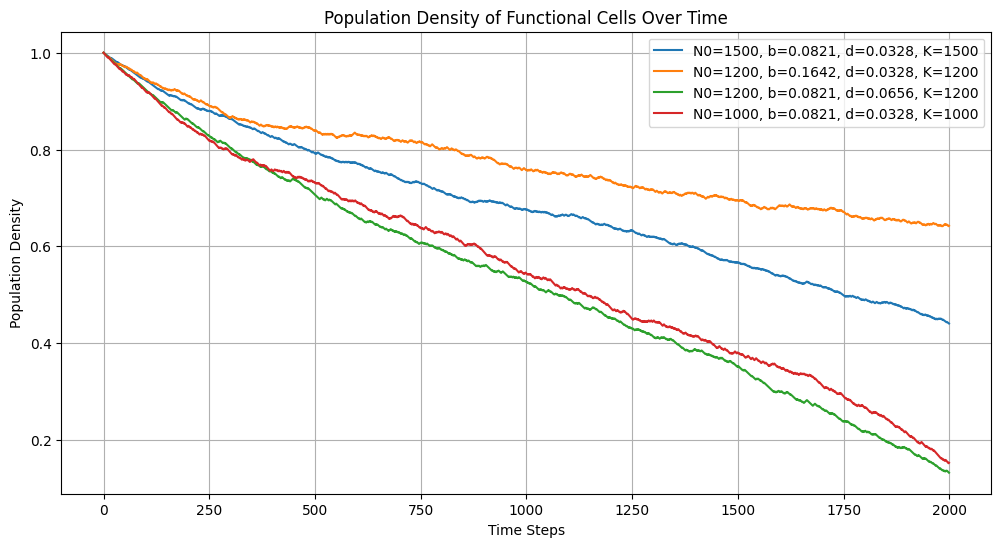

In [7]:
# Parameter sets to explore
parameter_sets = [
    {"N0": 1500, "b": 0.0821, "d": 0.0328, "K": 1500},
    {"N0": 1200, "b": 0.1642, "d": 0.0328, "K": 1200},
    {"N0": 1200, "b": 0.0821, "d": 0.0656, "K": 1200},
    {"N0": 1000, "b": 0.0821, "d": 0.0328, "K": 1000},
]


# Run and plot results
run_simulation_and_plot(parameter_sets, 2000)